In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib import cm
import seaborn as sns

In [2]:
data = pd.read_csv('nba_rankings_2014-2020.csv')
print(data.shape)

(2412, 32)


In [3]:
# data format:
data.dtypes

Unnamed: 0      int64
PLAYER         object
TEAM           object
AGE             int64
SEASON         object
GP              int64
W               int64
L               int64
MIN           float64
PTS           float64
FGM           float64
FGA           float64
FG%           float64
3PM           float64
3PA           float64
3P%           float64
FTM           float64
FTA           float64
FT%           float64
OREB          float64
DREB          float64
REB           float64
AST           float64
TOV           float64
STL           float64
BLK           float64
PF            float64
FP            float64
DD2           float64
TD3           float64
+/-           float64
rankings      float64
dtype: object

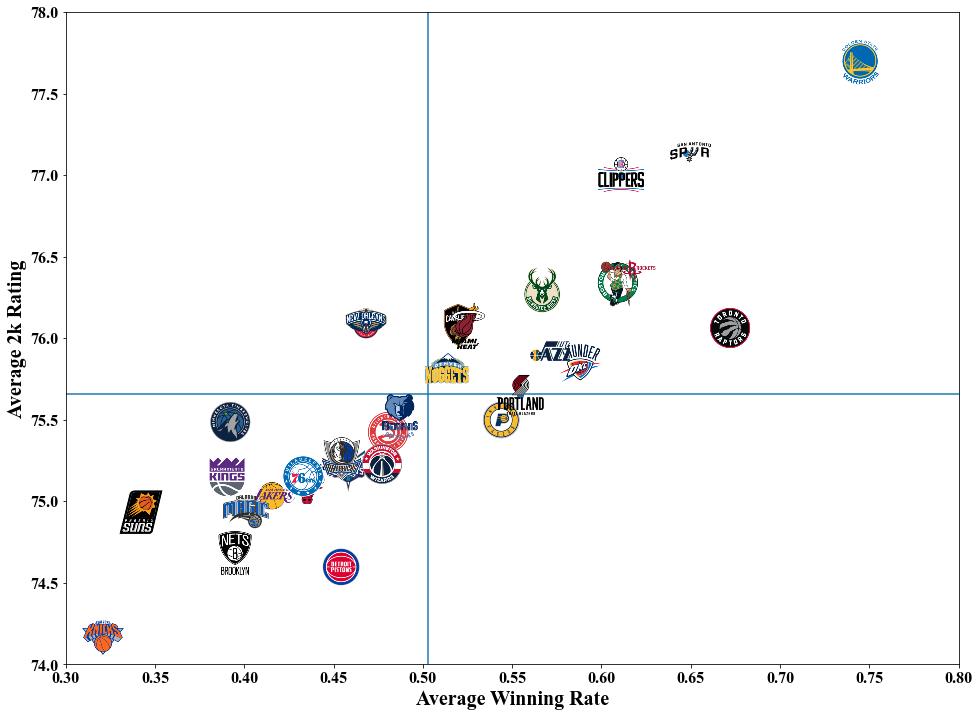

In [4]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.pyplot import MultipleLocator

def wavg(group, avg_name, weight_name):
    d = group[avg_name]
    w = group[weight_name]
    try:
        return d.sum() / w.sum()
    except ZeroDivisionError:
        return d.mean()


rates = data.groupby('TEAM')['+/-'].mean().sort_index()
ranks = data.groupby('TEAM')['rankings'].mean().sort_index()
x = rates.index
y1, y2 = rates.values, ranks.values
y3 = []
for i in x:
    curr = data[data['TEAM'] == i]
    y3.append(wavg(curr, 'W', 'GP'))

fig, ax = plt.subplots(figsize = (16, 12))
ax.scatter(y3, y2)
plt.set_cmap(cm.gray)
for i in range(30):
    ab = AnnotationBbox(OffsetImage(plt.imread('smartResize/' + str(x[i])+".png")), (y3[i], y2[i]), frameon=False)
    ax.add_artist(ab)
ax = plt.gca()
#ax.set_aspect(1)
plt.yticks(fontproperties = 'Times New Roman', size = 16)
plt.xticks(fontproperties = 'Times New Roman', size = 16)
plt.xlabel('Average Winning Rate', fontdict = {'family' : 'Times New Roman', 'size'   : 20})
plt.ylabel('Average 2k Rating', fontdict = {'family' : 'Times New Roman', 'size'   : 20})
plt.axhline(y = np.mean(y2))
plt.axvline(x = np.mean(y3))
ax.xaxis.set_major_locator(MultipleLocator(0.05))
ax.yaxis.set_major_locator(MultipleLocator(0.5))
plt.xlim(0.3, 0.8)
plt.ylim(74,78)
plt.savefig('2k_teams.png')
plt.show()

In [20]:
players = data.groupby('PLAYER')['rankings'].mean()
players = players.sort_values(ascending = False)
print(players.head())
x, y = players.index[0:20], players.values[0:20]
y2 = []
y3 = []
for i in x:
    y2.append(data[data['PLAYER'] == i]['SEASON'].count())
    y3.append(data[data['PLAYER'] == i]['TEAM'].nunique())

PLAYER
LeBron James     96.500000
Kevin Durant     94.600000
Stephen Curry    94.333333
James Harden     94.166667
Kawhi Leonard    93.666667
Name: rankings, dtype: float64


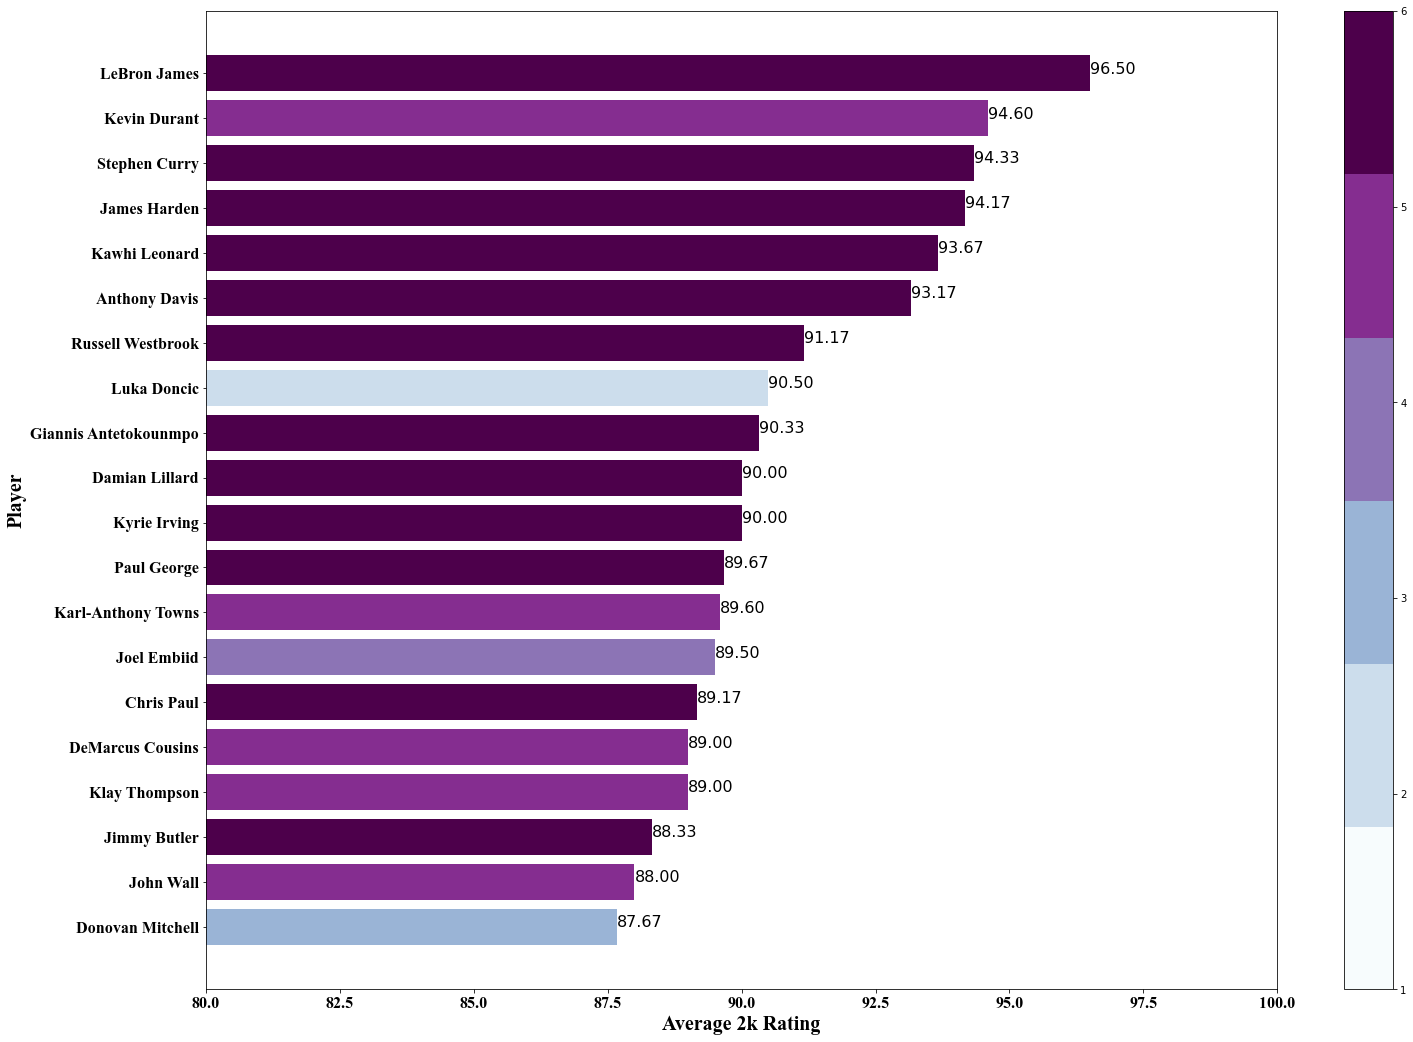

In [21]:
i = np.arange(20)
norm = plt.Normalize(1, 6)
norm_values = norm(y2)
map_vir = cm.get_cmap('BuPu', 6)
colors = map_vir(norm_values)
fig = plt.figure(figsize = (24, 18))
plt.subplot(111)
ax = plt.barh(i, y, color = colors, tick_label = x)
plt.gca().invert_yaxis()
plt.xlim((80, 100))
sm = cm.ScalarMappable(cmap=map_vir,norm=norm)
sm.set_array([])
plt.colorbar(sm)
plt.yticks(fontproperties = 'Times New Roman', size = 16)
plt.xticks(fontproperties = 'Times New Roman', size = 16)
for a, b in zip(i, y):
    plt.text(b, a, '%.2f'%b, fontsize=16)
plt.xlabel('Average 2k Rating', fontdict={'family' : 'Times New Roman', 'size'   : 20})
plt.ylabel('Player', fontdict={'family' : 'Times New Roman', 'size'   : 20})
plt.savefig('2k_players.png')
plt.show()

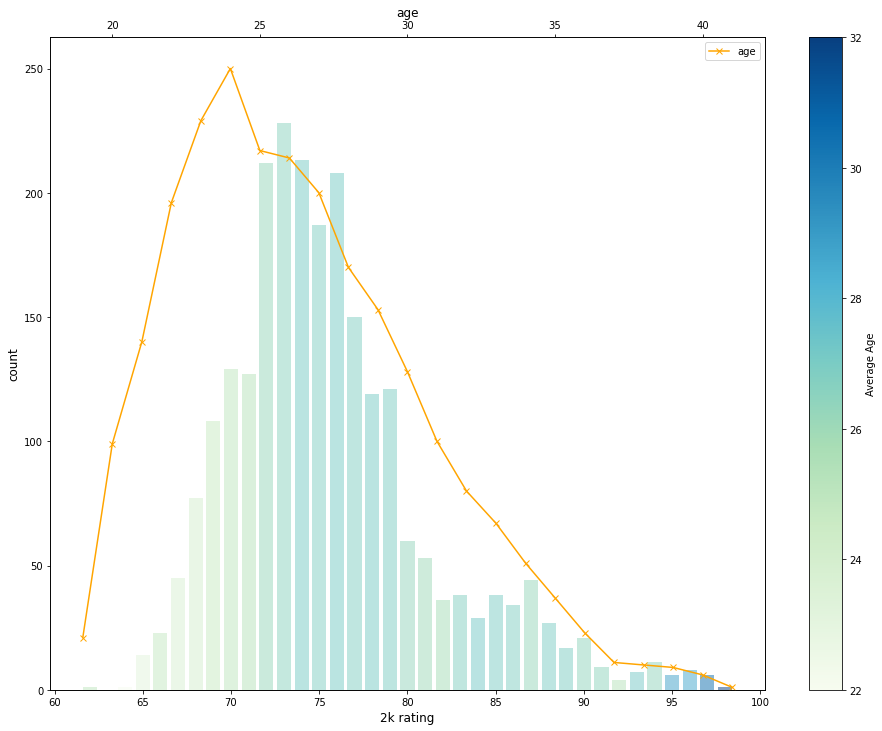

In [4]:
rank = data.groupby('rankings')['PLAYER'].count()
age = data.groupby('AGE')['PLAYER'].count()
x1, y1 = rank.index, rank.values
x2, y2 = age.index, age.values
y3 = []
for i in x1:
    curr = data[data['rankings'] == i]
    y3.append(curr['AGE'].mean())

norm = plt.Normalize(22, 32)
norm_values = norm(y3)
map_vir = cm.get_cmap(name = 'GnBu')
colors = map_vir(norm_values)
fig = plt.figure(figsize = (16, 12))
ax1 = fig.add_subplot(111)
ax1.bar(x = x1, height = y1, color = colors, alpha = 0.5)
sm = cm.ScalarMappable(cmap=map_vir,norm=norm)
sm.set_array([])
cb = plt.colorbar(sm)
cb.set_label('Average Age')
ax2 = ax1.twiny()
ax2.plot(x2, y2, label = 'age', color = 'orange', marker = "x")
plt.legend(loc = 'upper right')
'''
for tl in ax1.get_xticklabels():
    tl.set_color('blue')
    t1.set_fontsize(12)
for tl in ax1.get_yticklabels():
    tl.set_fontsize(12)
for tl in ax2.get_xticklabels():
    tl.set_color('orange')
    t1.set_fontsize(12)
'''
ax1.set_xlabel('2k rating', size = 12)
ax2.set_xlabel('age', size = 12)
ax1.set_ylabel('count', size = 12)
plt.savefig('2k_distribution.png')
plt.show()

In [13]:
rks = data.groupby(['SEASON', 'rankings'])['PLAYER'].count()
#print(rks.head(10))
x1, x2, x3, x4, x5, x6 = [], [], [], [], [], []
y1, y2, y3, y4, y5, y6 = [], [], [], [], [], []
for i in rks.index:
    if i[0] == '2014-15':
        x1.append(i[1])
        y1.append(rks[i])
    if i[0] == '2015-16':
        x2.append(i[1])
        y2.append(rks[i])
    if i[0] == '2016-17':
        x3.append(i[1])
        y3.append(rks[i])
    if i[0] == '2017-18':
        x4.append(i[1])
        y4.append(rks[i])
    if i[0] == '2018-19':
        x5.append(i[1])
        y5.append(rks[i])
    if i[0] == '2019-20':
        x6.append(i[1])
        y6.append(rks[i])
#print(x1, y1)

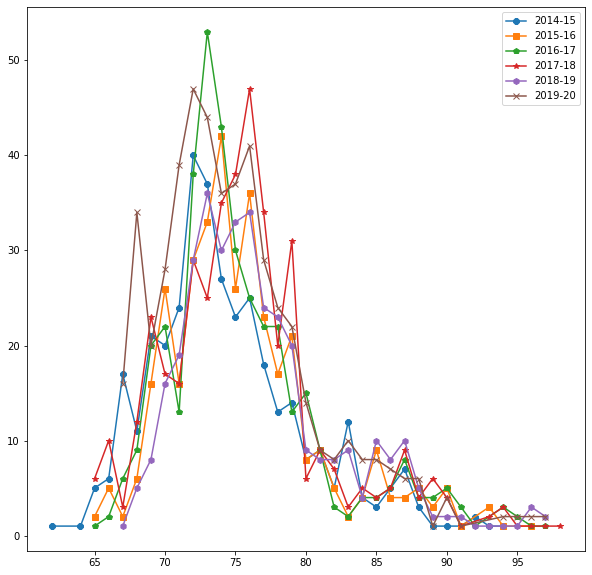

In [14]:
plt.subplots(figsize = (10, 10))
plt.plot(x1, y1, label = '2014-15', marker = "8")
plt.plot(x2, y2, label = '2015-16', marker = "s")
plt.plot(x3, y3, label = '2016-17', marker = "p")
plt.plot(x4, y4, label = '2017-18', marker = "*")
plt.plot(x5, y5, label = '2018-19', marker = "h")
plt.plot(x6, y6, label = '2019-20', marker = "x")
plt.legend(loc = 'upper right')
plt.show()

(2412, 33)


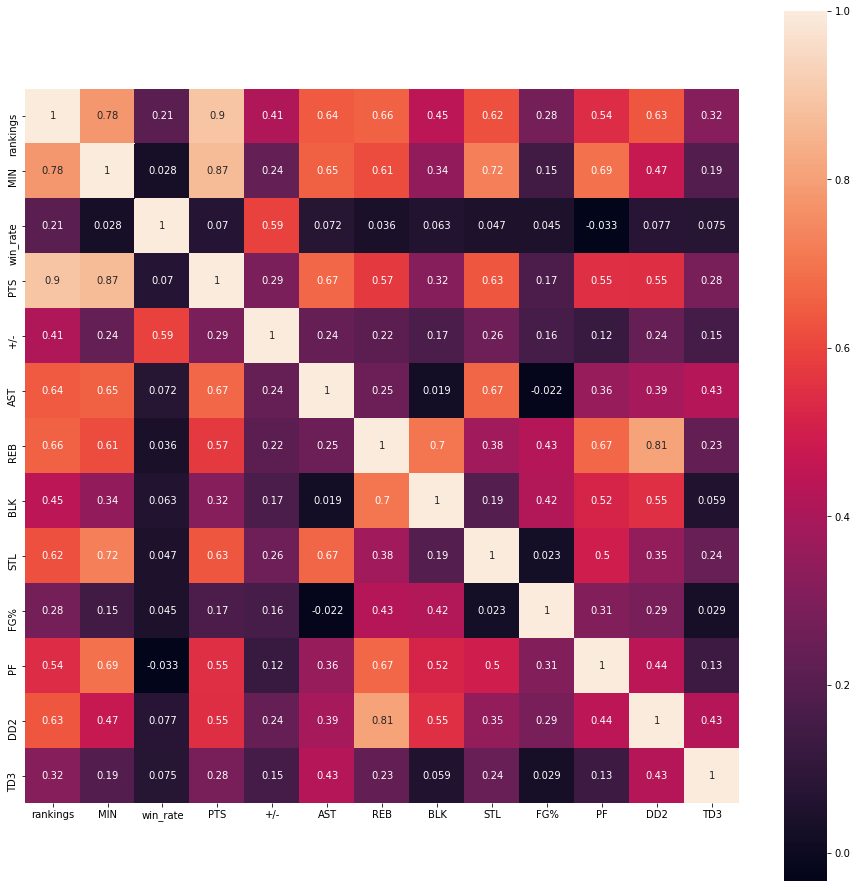

In [4]:
data['win_rate'] = data['W'] / data['GP']
print(data.shape)
cor = data[['rankings', 'MIN', 'win_rate', 'PTS', '+/-', 'AST', 'REB', 'BLK', 'STL', 'FG%', 'PF', 'DD2', 'TD3']].corr()
plt.subplots(figsize = (16, 16))
sns.heatmap(cor, annot=True, vmax=1, square=True)
plt.savefig('2k_correlation.png')
plt.show()

C:\Python\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Python\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Python\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Python\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Python\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


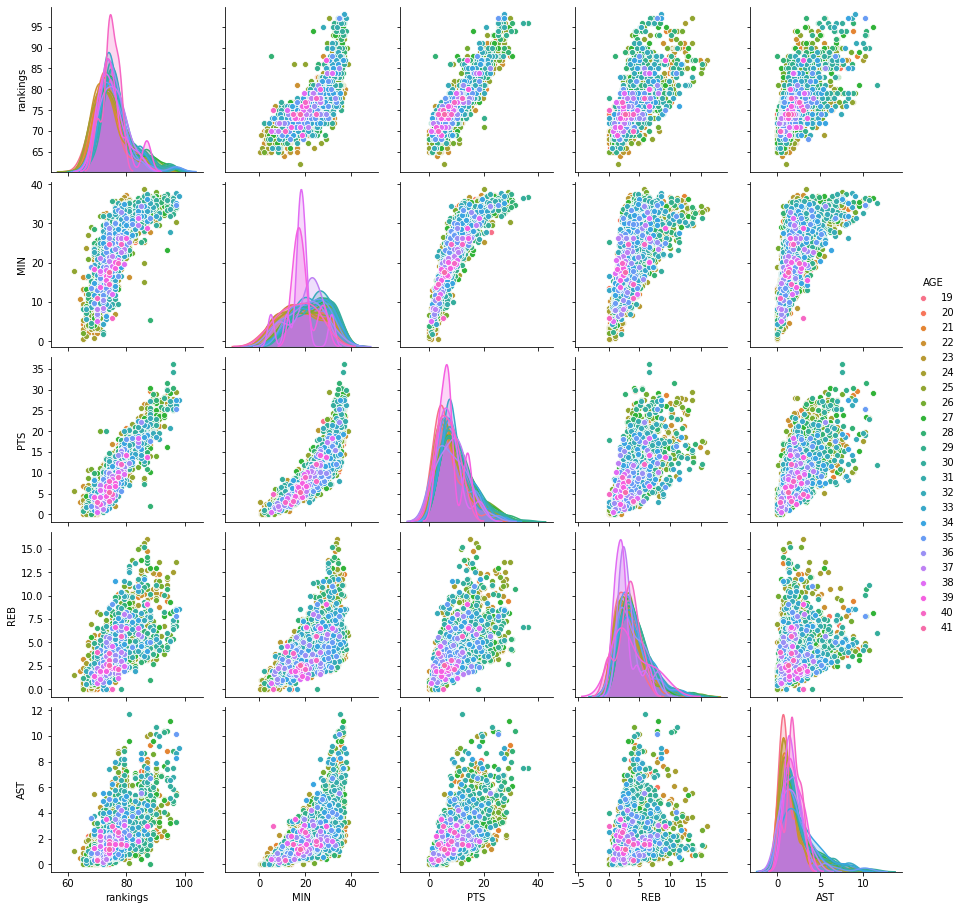

In [8]:
sns.pairplot(data = data, hue = 'AGE', vars = ['rankings', 'MIN', 'PTS', 'REB', 'AST'])
plt.savefig('2k_pairplot.png')
plt.show()